# Data Cleaning and EDA

In this notebook, I perform data cleaning and data exploration. 

**Contents:**
- [Imports](#Import-Libraries)
- [Preliminary review of data](#Read-and-Peruse-Data)
- [Data Exploration](#Data-Exploration)
- [Save data](#Save-Data)

### Import Libraries

In [1]:
#imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
from scipy import stats
#install the latest v of pandas profiling
import sys
!{sys.executable} -m pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
print("All imported successfully!")
%matplotlib inline

  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243837 sha256=98b1d95651a68f0d1dcad4791fa15868deff51978bd4be27fdc9f72d1cb22238
  Stored in directory: C:\Users\2awan\AppData\Local\Temp\pip-ephem-wheel-cache-eqo3puhc\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.11.0
    Uninstalling pandas-profiling-2.11.0:
      Successfully uninstalled pandas-profiling-2.11.0
All imported successfully!


### Read and Peruse Data
I use the pandas profiling library to generate a report with summary statistics about the data. 

In [3]:
#read dataset and check data
cc = pd.read_csv("../data/creditcard.csv")
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#generate html summarization report about data
report = ProfileReport(cc)
report.to_file(output_file = "report.html")

From the report, we note the following: 
* data comprise the columns time, V1 to V28, amount and class. only the V columns are normalised with mean of 0 and standard deviation between 1 and 2. 
* the transaction amount column has a pretty huge variance suggesting that there are some really high outliers. The maximum amount is at 25,691 whereas its mean is only at 88.3. I will scale this at the preprocessing stage, prior to modelling
* there are no missing values in the dataset, so there is no need to handle these
* there are 1081 duplicate rows, which is 0.4% of the data set and pretty insignificant. The duplicated rows could be erroneously generated or real separated transactions. As the volume of duplicated entries is very low, I drop them.

In [57]:
# function that reformats column names and drop duplicates
def reformat_cols(df):
    df.columns = [x.lower() for x in df.columns]
    print("==================== Reformatted columns ====================")
    print(df.columns)
    print("==================== Shape with duplicates ====================")
    print(df.shape)
    df.drop_duplicates(inplace=True)
    print("==================== Shape after dropping duplicates ====================")
    print(df.shape)

In [58]:
reformat_cols(cc)

==================== Reformatted columns ====================
Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')
==================== Shape with duplicates ====================
(284807, 31)
==================== Shape after dropping duplicates ====================
(283726, 31)


### Data Exploration 
Look at how timing of transactions affect occurrence of fraudulent transactions. Here I also print a visual of the imbalanced class. 

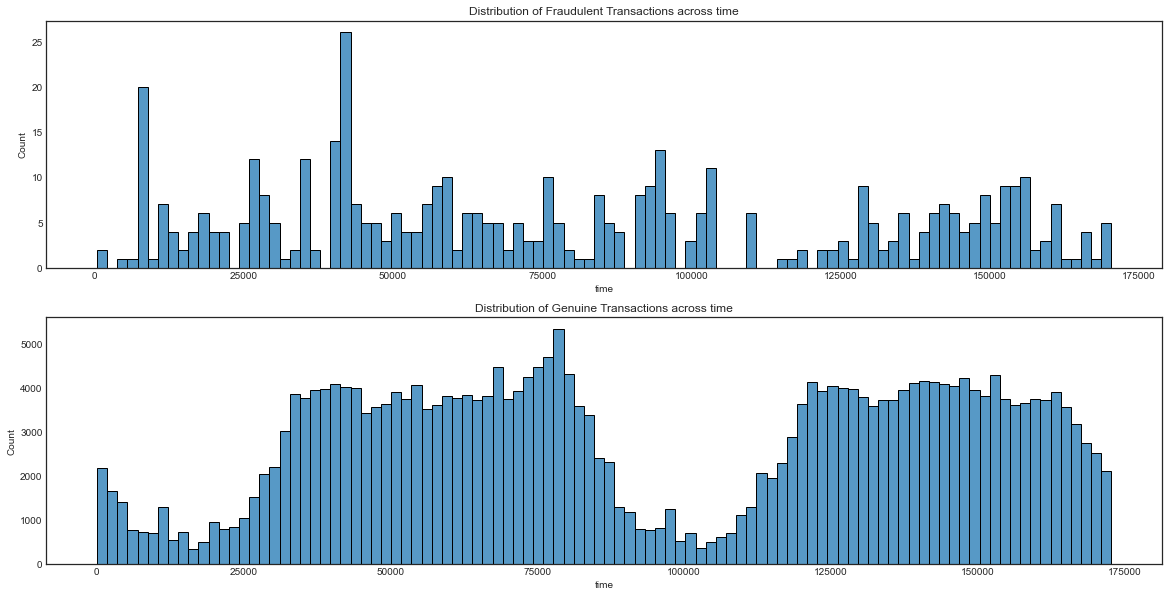

In [59]:
# distribution of time of transactions
fig, axs = plt.subplots(figsize = (20,10), sharex=True)
ax1 = plt.subplot(211)
sns.histplot(ax=ax1, data=cc[cc['class']==1], x='time', bins=100)
ax1.set_title("Distribution of Fraudulent Transactions across time")
ax2 = plt.subplot(212)
sns.histplot(ax=ax2, data=cc[cc['class']==0], x='time', bins=100)
ax2.set_title("Distribution of Genuine Transactions across time")
plt.show()

* Based on the distribution of genuine transactions, we can see that the credit card transactions made are cyclical. There are much lower transactions made when time <25,000 and between 75,000 and 125,000.
* However between genuine and fraudulent transactions, there isn't much inference value as to whether fraudulent trnasactions occur only at a specific time frame. 
* It is unlikely that time would add significant value to our analysis so I will drop this feature. 

In [60]:
# drop time
cc.drop(columns=['time'],inplace = True)
print("========= Columns =========")
print(cc.columns)

========= Columns =========
Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'class'],
      dtype='object')


In [61]:
# view imbalanced class 
cc['class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: class, dtype: float64

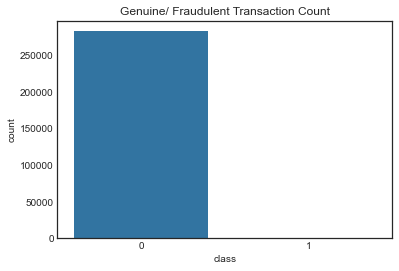

In [62]:
# plot count
sns.countplot(data=cc, x='class')
plt.title("Genuine/ Fraudulent Transaction Count")
plt.show()

* Highly imbalanced classes with only 0.167% of transactions classified as fraudulent

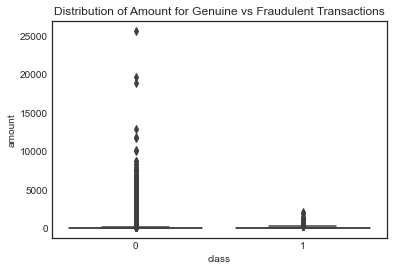

In [63]:
#identify characteristics of genuine vs fraudulent transactions
sns.boxplot(data=cc, x='class',y='amount')
plt.title("Distribution of Amount for Genuine vs Fraudulent Transactions")
plt.show()

* It appears that fraudulent transactions comprise those with amounts <500, while genuine transactions have amounts up to ~25,000
* Genuine transactions are heavily right-skewed as seen in the huge outliers on the right
* There appear to be no relation between transaction amount and its class ie. fraudulent or genuine
* Amounts have to be scaled during preprocessing prior to modelling. 

### Save Data
Save cleaned data for preprocessing [here](02-preprocessing.ipynb).

In [64]:
cc.to_csv("../data/cc_clean.csv", index=False)